In [2]:
#import statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#load the data

eda_df=pd.read_csv('linkedin_cleaned.csv')

eda_df.head()

,post_title,post_link,post_type,posted_by,created_date,audience,impressions,clicks,click_through_rate_(ctr),likes,comments,reposts,engagement_rate
0,We are so excited as well Anna Islamova!\n🚀 RE...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,Talia Standring,2025-03-26,All followers,373,31,0.083110,8,2,4,0.120643
1,Exciting News for Our Community!\n\n1️⃣ Go fol...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,Talia Standring,2025-03-20,All followers,297,27,0.090909,6,1,1,0.117845
2,✨𝐌𝐨𝐧𝐝𝐚𝐲 𝐌𝐞𝐦𝐛𝐞𝐫 𝐒𝐩𝐨𝐭𝐥𝐢𝐠𝐡𝐭🔦 \n\nMeet ️Iseabail L...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,Talia Standring,2025-03-10,All followers,260,5,0.019231,8,0,2,0.057692
3,"🌟 Happy 𝗜𝗻𝘁𝗲𝗿𝗻𝗮𝘁𝗶𝗼𝗻𝗮𝗹 𝗪𝗼𝗺𝗲𝗻’𝘀 𝗗𝗮𝘆! 🌟\n\nToday,...",https://www.linkedin.com/feed/update/urn:li:ac...,Organic,Talia Standring,2025-03-08,All followers,373,11,0.029491,22,2,3,0.101877
4,Join Innovate@UCLA for an inspiring Women in T...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,Talia Standring,2025-03-05,All followers,387,26,0.067183,14,2,2,0.113695


In [14]:
#checking the column type
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   post_title                10 non-null     object 
 1   post_link                 10 non-null     object 
 2   post_type                 10 non-null     object 
 3   posted_by                 10 non-null     object 
 4   created_date              10 non-null     object 
 5   audience                  10 non-null     object 
 6   impressions               10 non-null     int64  
 7   clicks                    10 non-null     int64  
 8   click_through_rate_(ctr)  10 non-null     float64
 9   likes                     10 non-null     int64  
 10  comments                  10 non-null     int64  
 11  reposts                   10 non-null     int64  
 12  engagement_rate           10 non-null     float64
dtypes: float64(2), int64(5), object(6)
memory usage: 1.1+ KB


In [17]:
eda_df['created_date']=pd.to_datetime(eda_df['created_date'])

eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   post_title                10 non-null     object        
 1   post_link                 10 non-null     object        
 2   post_type                 10 non-null     object        
 3   posted_by                 10 non-null     object        
 4   created_date              10 non-null     datetime64[ns]
 5   audience                  10 non-null     object        
 6   impressions               10 non-null     int64         
 7   clicks                    10 non-null     int64         
 8   click_through_rate_(ctr)  10 non-null     float64       
 9   likes                     10 non-null     int64         
 10  comments                  10 non-null     int64         
 11  reposts                   10 non-null     int64         
 12  engagement_rate          

In [18]:
eda_df.describe()

,created_date,impressions,clicks,click_through_rate_(ctr),likes,comments,reposts,engagement_rate
count,10,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,2025-02-18 00:00:00,561.900000,42.400000,0.061042,23.600000,1.900000,2.600000,0.110045
min,2025-01-02 00:00:00,260.000000,5.000000,0.011918,6.000000,0.000000,0.000000,0.050921
25%,2025-02-01 06:00:00,373.000000,11.250000,0.027507,9.500000,0.250000,2.000000,0.079146
50%,2025-02-22 00:00:00,417.000000,22.500000,0.051087,19.000000,2.000000,2.500000,0.107786
75%,2025-03-09 12:00:00,610.500000,30.000000,0.082080,29.250000,2.000000,3.750000,0.119944
max,2025-03-26 00:00:00,1383.000000,232.000000,0.167751,58.000000,7.000000,5.000000,0.216920
std,NaN,347.448621,67.892399,0.047294,17.740099,2.078995,1.505545,0.049085


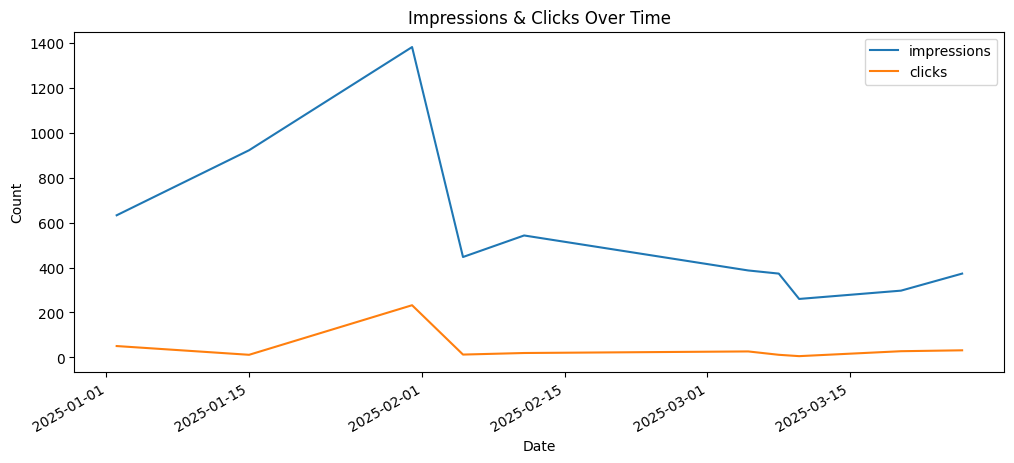

In [20]:
#Daily trends

eda_df.set_index('created_date')[['impressions', 'clicks']].plot(figsize=(12, 5), title='Impressions & Clicks Over Time')

plt.ylabel('Count')
plt.xlabel('Date')
plt.show()

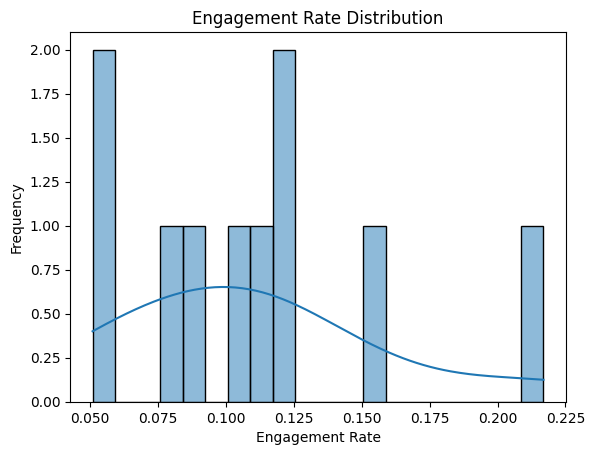

In [21]:
#Engagement Rate distribution

sns.histplot(eda_df['engagement_rate'], bins=20, kde=True)
plt.title('Engagement Rate Distribution')
plt.xlabel('Engagement Rate')
plt.ylabel('Frequency')
plt.show()

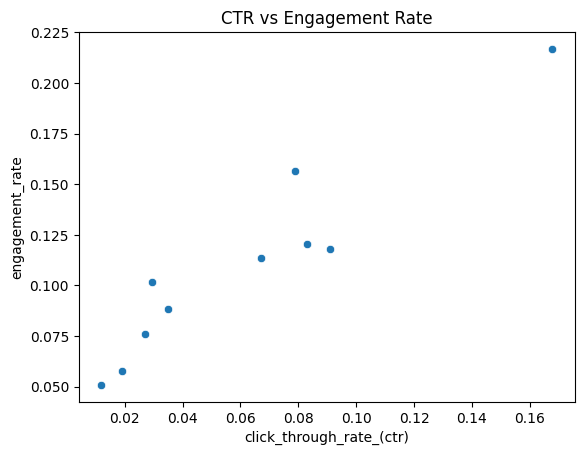

In [22]:
sns.scatterplot(data=eda_df, x='click_through_rate_(ctr)', y='engagement_rate')
plt.title('CTR vs Engagement Rate')
plt.show()


In [26]:
top_posts = eda_df.sort_values(by='engagement_rate', ascending=False).head(5)
top_posts[['created_date','post_title' ,'impressions', 'clicks', 'likes', 'engagement_rate']]

,created_date,post_title,impressions,clicks,likes,engagement_rate
7,2025-01-31,"🎉 Yesterday, some of our incredible volunteers...",1383,232,58,0.216920
9,2025-01-02,✨ Happy Holidays and a Bright New Year! 🎉\n\nA...,633,50,49,0.156398
0,2025-03-26,We are so excited as well Anna Islamova!\n🚀 RE...,373,31,8,0.120643
1,2025-03-20,Exciting News for Our Community!\n\n1️⃣ Go fol...,297,27,6,0.117845
4,2025-03-05,Join Innovate@UCLA for an inspiring Women in T...,387,26,14,0.113695
